In [99]:
import os
import tqdm
import xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline


def notify(title, subtitle='', message=''):
    t = '-title {!r}'.format(title)
    s = '-subtitle {!r}'.format(subtitle)
    m = '-message {!r}'.format(message)
    os.system('terminal-notifier {}'.format(' '.join([m, t, s])))

In [100]:
def is_vowel(ch):
    return ch.lower() in 'уеыаоэёяию'

def is_consonant(ch):
    return ch.lower() in 'йцкнгшщзхъфвпрлджчсмтьб'

def num_vowels(string):
    ans = 0
    for c in string:
        if is_vowel(c):
            ans += 1
    return ans

def is_caps(string):
    """
    RETURNS
    -------
    int : {0,1,2}
        0 - all chars are caps
        1 - only first char is caps
        2 - all chars are lower
    
    """
    if all(list(map(lambda x: x == x.upper(), string))):
        return 0
    elif string[0] == string[0].upper():
        return 1
    else:
        return 2


alphabet = ''.join([chr(i) for i in range(ord('а'), ord('я')+1)])
ch_gram_alphabet = []

for i in alphabet:
    for j in alphabet:
        ch_gram_alphabet.append(i + j)

print(len(ch_gram_alphabet))

print(ch_gram_alphabet.index('ля'))


def index_of_last_pair(string):
    return ch_gram_alphabet.index(string[-2:].lower())

1024
383


In [ ]:
sum(train_y)/len(train_y)

In [116]:
%%time
test = pd.read_csv("linear_test.txt", header=None, names=['x'])
train = pd.read_csv("linear_train.txt", header=None, names=['x', 'y'])
train_y = train['y']
train = train.drop(['y'], axis=1)

test['x'] = list(map(lambda x: x.replace('ё', 'е'), test['x']))
train['x'] = list(map(lambda x: x.replace('ё', 'е'), train['x']))

ch_gram_alphabet = list(set.union(set(ch_gram_alphabet), set(list(map(lambda x: x[-2:].lower(), train['x']))), set(list(map(lambda x: x[-2:].lower(), test['x'])))))
print(len(ch_gram_alphabet))

# train['length'] = list(map(lambda x: len(x), train['x']))
train['vowels'] = list(map(lambda x: num_vowels(x), train['x']))
train['caps'] = list(map(lambda x: is_caps(x), train['x']))
train['last'] = list(map(lambda x: ord(x[-1]), train['x']))
train['first'] = list(map(lambda x: ord(x[0]), train['x']))
train['last_pair'] = list(map(lambda x: index_of_last_pair(x), train['x']))

# test['length'] = list(map(lambda x: len(x), test['x']))
test['vowels'] = list(map(lambda x: num_vowels(x), test['x']))
test['caps'] = list(map(lambda x: is_caps(x), test['x']))
test['last'] = list(map(lambda x: ord(x[-1]), test['x']))
test['first'] = list(map(lambda x: ord(x[0]), test['x']))
test['last_pair'] = list(map(lambda x: index_of_last_pair(x), test['x']))

sample_submission = pd.read_csv("linear_ans_example.txt")

1117
CPU times: user 8.08 s, sys: 217 ms, total: 8.3 s
Wall time: 8.64 s


# First Stupid Predictions

0.895639397286


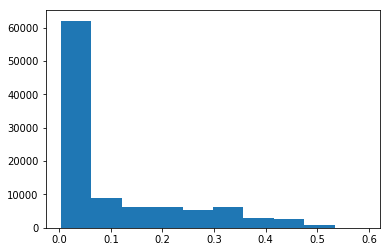

True


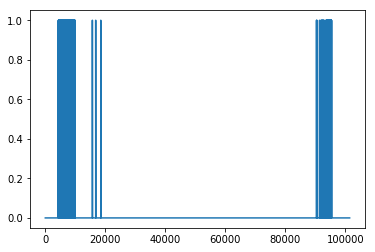

[('Багио', 0), ('Бадан', 0), ('Бадминтон', 0), ('Базин', 1), ('Базис', 0), ('Байес', 1), ('Бакстон', 1), ('Баландин', 1), ('Баланс', 0), ('Баланчин', 1), ('Балатон', 0), ('Балбес', 0), ('Балдахин', 0), ('Балкон', 0), ('Баловство', 0), ('Банн', 1), ('Барин', 0), ('Бармен', 0), ('Бармин', 1), ('Барнс', 1), ('Баррето', 1), ('Баррингтон', 1), ('Барс', 0), ('Барс', 1), ('Басин', 1), ('Бассейн', 0), ('Бастос', 1), ('Батаан', 0), ('Баталин', 1), ('Батон', 0), ('Баттон', 1), ('Бауманн', 1), ('Баумен', 1), ('Баумэн', 1), ('Башен', 0), ('Баян', 0), ('Бевинс', 1), ('Бедро', 0), ('Бейлис', 1), ('Бейтс', 1), ('Бекманн', 1), ('Бекон', 0), ('Белкин', 1), ('Бен', 0), ('Бен', 1), ('Бендиго', 0), ('Бензедрин', 0), ('Бензин', 0), ('Бенин', 1), ('Бергамо', 0), ('Бердисс', 1), ('Березин', 1), ('Бержерон', 1), ('Берлин', 0), ('Берлингтон', 0), ('Берн', 1), ('Берн-Джонс', 1), ('Бернис', 0), ('Бернс', 1), ('Бернштайн', 1), ('Бернштейн', 1), ('Беседин', 1), ('Бесс', 0), ('Бесстыдство', 0), ('Беттертон', 1), ('

In [35]:
%%time
clf = XGBClassifier()

train_x = train.drop(['x'], axis=1)
clf.fit(train_x, train_y)

print(accuracy_score(train_y, clf.predict(train_x)))

preds = clf.predict(train_x)
preds_prob = clf.predict_proba(train_x)

plt.hist(preds_prob[:, 1])
plt.show()
print(any(preds))

plt.plot(preds)
plt.show()

print([(train.iloc[i]['x'], train_y[i]) for i in [i for i, x in enumerate(preds) if x == 1]])

# Some Research...

In [323]:
# sample_submission['Answer'] = clf.predict_proba(test.drop(['x'], axis=1))[:, 1]
# [(test.iloc[i]['x'], sample_submission.iloc[i]['Answer']) for i in [i for i, x in enumerate(sample_submission['Answer']) if x > 0.5]]

In [151]:
make_ngrams('Аарон', 2)

['аа', 'ар', 'ро', 'он']

In [37]:
print('In Train Data:', set((''.join(train['x'])).lower()))

In Train Data: {'“', 'п', '2', 'з', 'к', 'л', 'х', '-', 'р', '/', 'о', 'т', '·', '7', 'ѐ', 'и', 'д', 'щ', 'ь', 'с', '»', "'", 'ъ', 'у', 'ц', '3', '4', 'н', 'ы', '.', 'в', 'ю', '«', 'ё', 'ó', '’', 'é', 'б', 'э', 'е', ' ', 'г', 'я', 'ч', 'м', 'ф', 'ж', 'а', 'ш', '”', 'й'}


In [39]:
print('In Test Data:', set((''.join(test['x'])).lower()))

In Test Data: {'“', 'п', '2', 'ë', 'з', 'к', 'л', 'х', '-', 'р', 'á', '/', 'о', 'т', '"', '7', 'и', '\\', 'д', '\xa0', 'щ', 'ь', 'с', '»', "'", 'ъ', '0', 'у', 'ц', '`', '3', '1', 'н', 'ы', '.', 'в', 'ю', '«', 'ё', 'ó', '’', 'é', 'ô', 'б', 'э', ' ', 'е', 'г', 'я', 'ч', 'м', 'ф', 'ж', 'а', 'ш', '&', 'й'}


In [104]:
def get_vector(ch_gram, gram_alphabet):
    ch_gram = ch_gram.lower()
    tmp = np.zeros(len(gram_alphabet))
    if ch_gram in gram_alphabet:
        tmp[gram_alphabet.index(ch_gram)] = 1
    return tmp
        
    
def string_to_vec(string, gram_alphabet):            
    string = string.lower()
    grams = make_ngrams(string, 2)
    tmp_ans = np.zeros(len(gram_alphabet))
    for gram in grams:
        tmp_ans += get_vector(gram, gram_alphabet)
    return tmp_ans / len(grams)


def make_ngrams(string, n=2):
    string = string.lower()
    return [string[i:i+n] for i in range(len(string) - n + 1)]

In [59]:
mat = np.random.uniform(0, 1, len(ch_gram_alphabet))

In [60]:
np.dot(mat, string_to_vec('квартира'))

0.50946543202392214

In [117]:
%%time
new_train = pd.DataFrame(columns=np.concatenate((train.columns.values, np.arange(len(ch_gram_alphabet)))))
new_train

res = []

for i in tqdm.tqdm(range(len(train))):
    res.append(np.concatenate((train.iloc[i], string_to_vec(train.iloc[i]['x'], gram_alphabet=ch_gram_alphabet))))
    
new_train = pd.DataFrame(data=res, columns=np.concatenate((train.columns.values, np.arange(len(ch_gram_alphabet)))))
    
notify('kek_1')

100%|██████████| 101408/101408 [01:23<00:00, 1218.39it/s]


CPU times: user 2min 3s, sys: 30.4 s, total: 2min 33s
Wall time: 2min 52s


In [118]:
%%time
clf = XGBClassifier(max_depth=23)
clf.fit(new_train.drop(['x'], axis=1), train_y)
notify('Trained!')

CPU times: user 1h 2min 52s, sys: 27.3 s, total: 1h 3min 19s
Wall time: 19min 41s


In [119]:
%%time
preds = clf.predict(new_train.drop(['x'], axis=1))

print(sum(train_y)/len(train_y))
print(sum(preds)/len(preds))

# it was 0.90675291890186183 with 0.87 on public leaderboard
# it was 0.95879023351214898 with 0.92 on public leaderboard
# it was 0.968493609972 with 0.92 on public leaderboard with 'length'
# it was 0.965722625434 with 0.92 on public leaderboard without 'length'
print(accuracy_score(train_y, preds))

0.10491282739
0.0752504733354
0.965722625434
CPU times: user 8.76 s, sys: 4.26 s, total: 13 s
Wall time: 10.6 s


In [120]:
%%time

new_test = pd.DataFrame(columns=np.concatenate((test.columns.values, np.arange(len(ch_gram_alphabet)))))
new_test

res_test = []

for i in tqdm.tqdm(range(len(test))):
    res_test.append(np.concatenate((test.iloc[i], string_to_vec(test.iloc[i]['x'], ch_gram_alphabet))))
    
new_test = pd.DataFrame(data=res_test, columns=np.concatenate((test.columns.values, np.arange(len(ch_gram_alphabet)))))

notify('kek_2')

100%|██████████| 188920/188920 [02:36<00:00, 1203.71it/s]


CPU times: user 3min 52s, sys: 1min 18s, total: 5min 10s
Wall time: 6min 4s


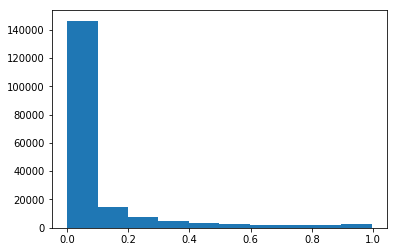

CPU times: user 19.6 s, sys: 23.9 s, total: 43.6 s
Wall time: 1min


In [121]:
%%time
sample_submission['Answer'] = clf.predict_proba(new_test.drop(['x'], axis=1))[:, 1]

plt.hist(sample_submission['Answer'])
plt.show()

In [122]:
[(test.iloc[i]['x'], sample_submission.iloc[i]['Answer']) for i in [i for i, x in enumerate(sample_submission['Answer']) if x > 0.5]]

[('Абаев', 0.83671123),
 ('Абаева', 0.98200661),
 ('Абаевым', 0.97905207),
 ('Абакумова', 0.99140716),
 ('АБАКУМОВА', 0.9696455),
 ('Абакумову', 0.97818244),
 ('Абакумовым', 0.99149621),
 ('Абалкин', 0.94377702),
 ('Абаринов', 0.86409855),
 ('Абасов', 0.63388115),
 ('Аббасова', 0.99354988),
 ('Аббасову', 0.98249477),
 ('Аббасом', 0.5660491),
 ('Аббе', 0.63815445),
 ('Абдрахманова', 0.98845065),
 ('Абдулин', 0.66251081),
 ('Абдулина', 0.84377861),
 ('Абдуллаев', 0.97117901),
 ('Абдуллаева', 0.94666749),
 ('Абдуллаеву', 0.92812735),
 ('Абдуллаевым', 0.98374289),
 ('Абдуллина', 0.81813765),
 ('Абдулов', 0.65252757),
 ('Абдулов', 0.65252757),
 ('Абелева', 0.97853386),
 ('Абелевым', 0.94486928),
 ('Абердин', 0.88119066),
 ('Абердина', 0.85959613),
 ('Абердине', 0.74409521),
 ('Абердину', 0.81721294),
 ('Абернати', 0.58648324),
 ('Абзацев', 0.62106371),
 ('АБЗАЦЕВ', 0.57261193),
 ('Абидин', 0.56800616),
 ('Абидина', 0.51877767),
 ('Абиев', 0.89923131),
 ('Абиевым', 0.98365629),
 ('Абилов', 0

In [123]:
sample_submission.to_csv("submission.csv", sep=',', index=False)
notify('Done with submission!')

In [128]:
%%time
lrs = LogisticRegression()

lrs.fit(new_train.drop(['x','vowels', 'caps', 'last', 'first', 'last_pair'], axis=1), train_y)
notify('LR Trained!')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').